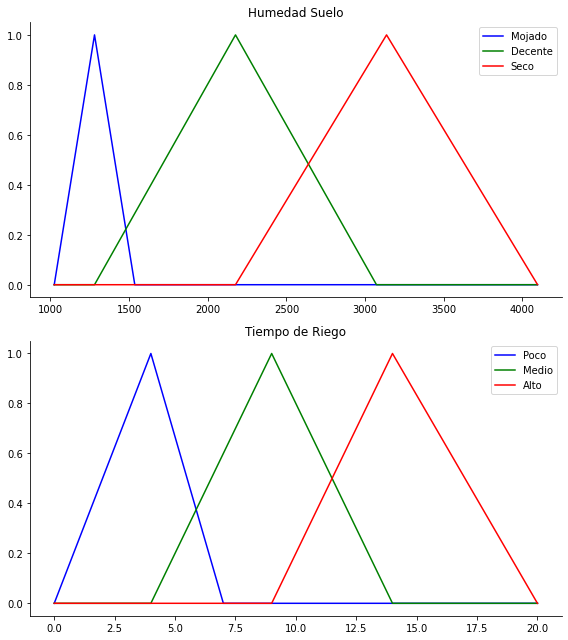

In [33]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# New Antecedent/Consequent objects hold universe variables and membership
# functions
humedad = np.arange(1024, 4096,1)
tiempo_riego  = np.arange(0, 21, 1)

humed_low = fuzz.trimf(humedad, [1024, 1280, 1536])
humed_md = fuzz.trimf(humedad, [1280, 2176, 3072])
humed_hi = fuzz.trimf(humedad, [2176, 3136, 4096])
riego_bajo = fuzz.trimf(tiempo_riego, [0, 4, 7])
riego_medio = fuzz.trimf(tiempo_riego, [4, 9 , 14])
riego_alto = fuzz.trimf(tiempo_riego, [9, 14, 20])

# Visualize these universes and membership functions
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 9))
ax0.plot(humedad, humed_low, 'b', linewidth=1.5, label='Mojado')
ax0.plot(humedad, humed_md, 'g', linewidth=1.5, label='Decente')
ax0.plot(humedad, humed_hi, 'r', linewidth=1.5, label='Seco')
ax0.set_title('Humedad Suelo')
ax0.legend()

ax1.plot(tiempo_riego, riego_bajo, 'b', linewidth=1.5, label='Poco')
ax1.plot(tiempo_riego, riego_medio, 'g', linewidth=1.5, label='Medio')
ax1.plot(tiempo_riego, riego_alto, 'r', linewidth=1.5, label='Alto')
ax1.set_title('Tiempo de Riego')
ax1.legend()

# Turn off top/right axes
for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

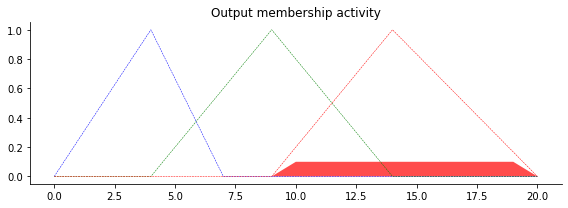

In [47]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
humedad_level_lo = fuzz.interp_membership(humedad, humed_low, 4000)
humedad_level_md = fuzz.interp_membership(humedad, humed_md, 4000)
humedad_level_hi = fuzz.interp_membership(humedad, humed_hi, 4000)

tip_activation_lo = np.fmin(humedad_level_lo, riego_bajo)
tip_activation_md = np.fmin(humedad_level_md, riego_medio)
tip_activation_hi = np.fmin(humedad_level_hi, riego_alto)
tiempo_riego0 = np.zeros_like(tiempo_riego)

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(tiempo_riego, tiempo_riego0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(tiempo_riego, riego_bajo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(tiempo_riego, tiempo_riego0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(tiempo_riego, riego_medio, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(tiempo_riego, tiempo_riego0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(tiempo_riego, riego_alto, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

14.500000000000002


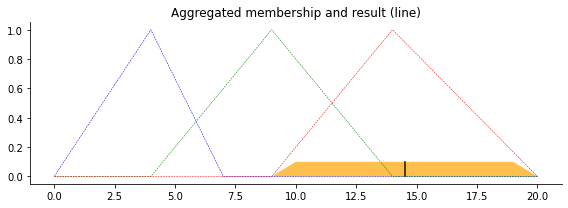

In [48]:
# Aggregate all three output membership functions together
aggregated = np.fmax(tip_activation_lo,
                     np.fmax(tip_activation_md, tip_activation_hi))

# Calculate defuzzified result
tip = fuzz.defuzz(tiempo_riego, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(tiempo_riego, aggregated, tip)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(tiempo_riego, riego_bajo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(tiempo_riego, riego_medio, 'g', linewidth=0.5, linestyle='--')
ax0.plot(tiempo_riego, riego_alto, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(tiempo_riego, tiempo_riego0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')
print(tip)
# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()